<a href="https://colab.research.google.com/github/rudipop/CanalSandeco/blob/master/carteiro_virtual_rec_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


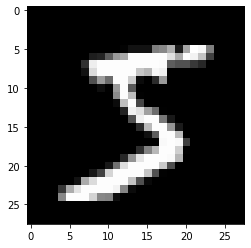

5


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

print(train_labels[0])

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#FLATTERING

In [9]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

#Normalizando

In [10]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255


In [11]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##Categorizando One Hot Encoder

In [12]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
# Importando Tensolrflow e keras

In [15]:
from tensorflow.keras import models, layers

#Criando rede neural

In [16]:
model = models.Sequential()

model.add(layers.Dense(32, activation='sigmoid', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


#Criando compilador keras

In [17]:
model.compile(optimizer='rmsprop',
            loss = 'categorical_crossentropy',
            metrics=['accuracy']    
            )

In [18]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.3026 - accuracy: 0.7127
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3752 - accuracy: 0.9048
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.9208
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2438 - accuracy: 0.9319
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2188 - accuracy: 0.9390
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1946 - accuracy: 0.9444
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1817 - accuracy: 0.9490
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1720 - accuracy: 0.9522
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1589 - accuracy: 0.9542
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1537 - accuracy: 0.9572

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 788us/step - loss: 0.1624 - accuracy: 0.9525


In [20]:
print('test_acc =', test_acc)

test_acc = 0.9524999856948853


##Salvar o modelo

In [21]:
model.save("mnist_carteiro.h5")